<a href="https://colab.research.google.com/github/mn-ju/Covid-19-forecasting/blob/main/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19**

# Preprocessing of Data

In [1]:
import pandas as pd

In [2]:
df_covid=pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")

In [3]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92540 entries, 0 to 92539
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92540 non-null  object 
 1   continent                              88150 non-null  object 
 2   location                               92540 non-null  object 
 3   date                                   92540 non-null  object 
 4   total_cases                            89750 non-null  float64
 5   new_cases                              89749 non-null  float64
 6   new_cases_smoothed                     88737 non-null  float64
 7   total_deaths                           79835 non-null  float64
 8   new_deaths                             79993 non-null  float64
 9   new_deaths_smoothed                    88737 non-null  float64
 10  total_cases_per_million                89270 non-null  float64
 11  ne

In [5]:
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.975000e+04,8.974900e+04,88737.000000,7.983500e+04,79993.000000,88737.000000,89270.000000,89269.000000,88262.000000,79368.000000,79526.000000,88262.000000,74471.000000,9329.000000,9329.000000,11596.000000,11596.000000,811.000000,811.000000,1466.000000,1466.000000,4.160100e+04,4.128900e+04,41289.000000,41601.000000,4.818000e+04,48180.000000,45373.000000,44776.000000,1.279000e+04,1.200300e+04,9.365000e+03,1.074600e+04,2.160300e+04,12790.000000,12003.000000,9365.000000,21603.000000,78221.000000,9.192600e+04,86071.000000,83084.000000,82146.000000,82623.000000,83304.000000,56353.000000,83494.000000,85404.000000,65359.000000,64400.000000,41953.000000,76123.000000,87870.000000,83673.000000
mean,9.428741e+05,6.061315e+03,6077.657802,2.536371e+04,142.102521,127.163287,11571.657720,76.082200,76.290754,252.106284,1.515893,1.356452,1.008643,1097.873406,27.126896,4821.179631,175.525296,291.056986,21.807018,3718.405486,114.550362,4.548567e+04,6.767446e+06,267.572512,2.021951,4.336336e+04,1.933987,0.089194,160.715892,2.132910e+07,1.203928e+07,6.646920e+06,5.300826e+05,2.620270e+05,18.135507,12.366156,7.094990,3075.363283,58.659822,1.262657e+08,380.884545,30.574610,8.797632,5.570539,19290.639035,13.382322,258.143755,7.883720,10.540618,32.673933,50.872085,3.028665,73.230405,0.727702
std,6.506951e+06,3.860077e+04,37872.198150,1.512175e+05,780.740150,721.466801,21783.994691,201.058875,158.088924,439.871654,3.932498,2.923277,0.353828,2972.514518,27.690314,12200.711613,214.945599,586.561760,36.889430,11094.859763,220.714020,1.670099e+05,3.007362e+07,608.917458,5.785983,1.523925e+05,4.856543,0.097238,890.052763,1.045179e+08,5.254745e+07,2.807272e+07,2.324592e+06,1.541723e+06,25.926819,16.169820,11.367382,8144.813108,21.238179,6.843893e+08,1773.835071,9.132163,6.217243,4.241496,19959.850354,19.954802,118.895496,4.073918,10.429258,13.477401,31.761251,2.460948,7.562845,0.150397
min,1.000000e+00,-3.486670e+05,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-5160.525000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,1.089000e+03,2.000000e+00,7.143000,4.900000e+01,0.000000,0.000000,227.224250,0.207000,1.231000,7.478000,0.000000,0.000000,0.850000,32.000000,4.793000,120.000000,23.692250,12.677500,1.909000,52.523750,9.638250,1.520000e+03,1.397590e+05,12.572000,0.132000,1.580000e+03,0.131000,0.017000,7.700000,8.432700e+04,6.768300e+04,3.436700e+04,3.796250e+03,8.630000e+02,1.560000,1.350000,0.640000,339.000000,44.440000,2.35162

In [6]:
df_covid.duplicated().sum()

0

In [7]:
df_covid.isnull().sum()

iso_code                                     0
continent                                 4390
location                                     0
date                                         0
total_cases                               2790
new_cases                                 2791
new_cases_smoothed                        3803
total_deaths                             12705
new_deaths                               12547
new_deaths_smoothed                       3803
total_cases_per_million                   3270
new_cases_per_million                     3271
new_cases_smoothed_per_million            4278
total_deaths_per_million                 13172
new_deaths_per_million                   13014
new_deaths_smoothed_per_million           4278
reproduction_rate                        18069
icu_patients                             83211
icu_patients_per_million                 83211
hosp_patients                            80944
hosp_patients_per_million                80944
weekly_icu_ad

# **New Cases**

In [8]:
df_covid['new_cases'].fillna('0',inplace=True)

In [9]:
df_covid['new_cases'] = df_covid['new_cases'].astype(int)

In [10]:
nc=df_covid.groupby('location').aggregate({'new_cases':'sum'})
nc

,new_cases
location,
Afghanistan,71838
Africa,4840460
Albania,132315
Algeria,128913
Andorra,13727
...,...
Wallis and Futuna,0
World,170599725
Yemen,6742


In [11]:
nc=pd.DataFrame(nc)


In [12]:
nc=nc.sort_values('new_cases')
nc

,new_cases
location,
Curacao,0
British Virgin Islands,0
Cayman Islands,0
Sint Maarten (Dutch part),0
Cook Islands,0
...,...
United States,33264379
North America,38897472
Europe,46887217


In [13]:
nc=nc.reset_index()
nc

,location,new_cases
0,Curacao,0
1,British Virgin Islands,0
2,Cayman Islands,0
3,Sint Maarten (Dutch part),0
4,Cook Islands,0
...,...,...
225,United States,33264379
226,North America,38897472
227,Europe,46887217
228,Asia,51137799


In [14]:
nc[nc['location'].str.contains('Africa')]

,location,new_cases
67,Central African Republic,7091
203,South Africa,1665617
217,Africa,4840460


In [15]:
nc.drop([229],axis=0,inplace=True)
nc.drop([228],axis=0,inplace=True)
nc.drop([227],axis=0,inplace=True)
nc.drop([226],axis=0,inplace=True)
nc.drop([223],axis=0,inplace=True)
nc.drop([217],axis=0,inplace=True)

In [16]:
nc.head(30)

,location,new_cases
0,Curacao,0
1,British Virgin Islands,0
2,Cayman Islands,0
3,Sint Maarten (Dutch part),0
4,Cook Islands,0
5,Saint Helena,0
6,Pitcairn,0
7,Northern Cyprus,0
8,Faeroe Islands,0
9,Bonaire Sint Eustatius and Saba,0


In [17]:
nc.tail(10)

,location,new_cases
214,Argentina,3781784
215,Italy,4217821
216,United Kingdom,4503231
218,Russia,5013512
219,Turkey,5249404
220,France,5728788
221,Brazil,16545554
222,India,28047534
224,European Union,32198483
225,United States,33264379


## This shows that United States have highest number of cases

# **New Deaths**

In [18]:
df_covid['new_deaths'].fillna('0',inplace=True)

In [19]:
df_covid['new_deaths'] = df_covid['new_deaths'].astype(int)

In [20]:
nd=df_covid.groupby('location').aggregate({'new_deaths':'sum'})
nd

,new_deaths
location,
Afghanistan,2944
Africa,130636
Albania,2451
Algeria,3472
Andorra,127
...,...
Wallis and Futuna,0
World,3547192
Yemen,1321


In [21]:
nd=pd.DataFrame(nd)

In [22]:
nd=nd.sort_values('new_deaths')
nd

,new_deaths
location,
Marshall Islands,0
Greenland,0
Bermuda,0
Tonga,0
Bonaire Sint Eustatius and Saba,0
...,...
European Union,725646
South America,780195
North America,878102


In [23]:
nd=nd.reset_index()

In [24]:
nd.tail(20)

,location,new_deaths
210,Argentina,78093
211,Spain,79953
212,Iran,80156
213,Germany,88601
214,Colombia,88774
215,France,109690
216,Russia,119464
217,Italy,126128
218,United Kingdom,128045
219,Africa,130636


In [25]:
nd.drop([229],axis=0,inplace=True)
nd.drop([228],axis=0,inplace=True)
nd.drop([227],axis=0,inplace=True)
nd.drop([226],axis=0,inplace=True)
nd.drop([224],axis=0,inplace=True)
nd.drop([219],axis=0,inplace=True)

In [26]:
nd.head(38)

,location,new_deaths
0,Marshall Islands,0
1,Greenland,0
2,Bermuda,0
3,Tonga,0
4,Bonaire Sint Eustatius and Saba,0
5,Saint Kitts and Nevis,0
6,Gibraltar,0
7,French Polynesia,0
8,British Virgin Islands,0
9,Samoa,0


In [27]:
nd.tail(10)

,location,new_deaths
214,Colombia,88774
215,France,109690
216,Russia,119464
217,Italy,126128
218,United Kingdom,128045
220,Mexico,223568
221,India,329100
222,Brazil,462791
223,United States,594568
225,European Union,725646


# This shows that European Union have highest number of deaths

# **New Vaccinations**

In [28]:
df_covid['new_vaccinations'].fillna('0',inplace=True)

In [29]:
df_covid['new_vaccinations'] = df_covid['new_vaccinations'].astype(int)

In [30]:
nv=df_covid.groupby('location').aggregate({'new_vaccinations':'sum'})
nv

,new_vaccinations
location,
Afghanistan,2859
Africa,30893263
Albania,547995
Algeria,30
Andorra,4802
...,...
Wallis and Futuna,0
World,1903787551
Yemen,0


In [31]:
nv=pd.DataFrame(nv)

In [32]:
nv=nv.sort_values('new_vaccinations')
nv

,new_vaccinations
location,
Madagascar,0
Montserrat,0
Djibouti,0
Jersey,0
Democratic Republic of Congo,0
...,...
Europe,354066461
North America,360153446
China,558712000


In [33]:
nv=nv.reset_index()

In [34]:
nv.tail(20)

,location,new_vaccinations
210,Spain,18795193
211,Russia,19704813
212,Canada,23472211
213,Mexico,25766913
214,Turkey,28664360
215,Africa,30893263
216,Italy,34463658
217,France,36079358
218,Germany,49916629
219,Brazil,55117701


In [35]:
nv.drop([229],axis=0,inplace=True)
nv.drop([228],axis=0,inplace=True)
nv.drop([226],axis=0,inplace=True)
nv.drop([225],axis=0,inplace=True)
nv.drop([221],axis=0,inplace=True)
nv.drop([215],axis=0,inplace=True)

In [36]:
nv.tail(10)

,location,new_vaccinations
214,Turkey,28664360
216,Italy,34463658
217,France,36079358
218,Germany,49916629
219,Brazil,55117701
220,United Kingdom,61914048
222,India,196297637
223,European Union,244773774
224,United States,282359992
227,China,558712000


# This shows that China is most vaccinated

# **Forecasting using FbProphet for 30 days**

In [37]:
df_covid['date'] = pd.to_datetime(df_covid['date'])

In [38]:
df_covid['new_cases'] = df_covid['new_cases'].astype(int)
df_covid['new_deaths'] = df_covid['new_deaths'].astype(int)

In [39]:
df_1=df_covid.groupby('date').aggregate({'new_cases':'sum'})
df_1

,new_cases
date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2021-05-27,1711916
2021-05-28,1543199
2021-05-29,1476421


In [40]:
df_1=pd.DataFrame(df_1)

In [41]:
df_1=df_1.reset_index()
df_1

,date,new_cases
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
512,2021-05-27,1711916
513,2021-05-28,1543199
514,2021-05-29,1476421
515,2021-05-30,1198779


# **forecasting for new cases**

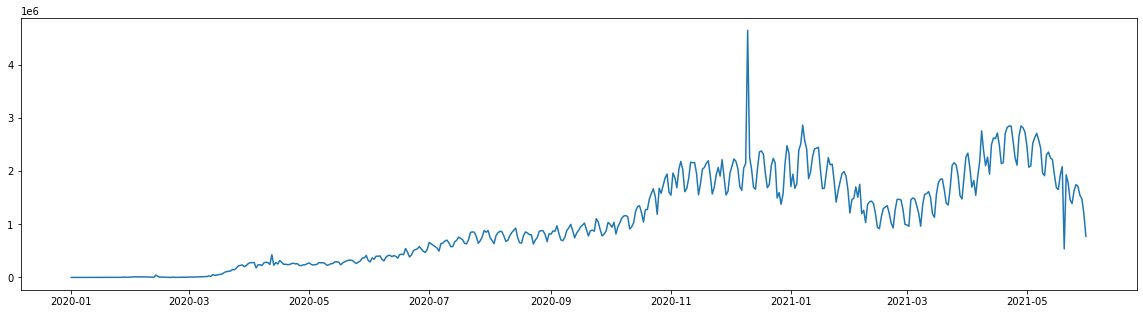

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_1['date'],df_1['new_cases'])

In [43]:
df_1= df_1.rename(columns ={'new_cases':'y','date':'ds'})

In [44]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_1)
x = model.make_future_dataframe(periods =30,freq='D')
forecast = model.predict(x)
forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,-76392.820304,-307408.866319,364547.094636,-76392.820304,-76392.820304,102815.094263,102815.094263,102815.094263,102815.094263,102815.094263,102815.094263,0.0,0.0,0.0,26422.273960
1,2020-01-02,-73925.374166,-269945.248621,428577.432387,-73925.374166,-73925.374166,140683.350136,140683.350136,140683.350136,140683.350136,140683.350136,140683.350136,0.0,0.0,0.0,66757.975971
2,2020-01-03,-71457.928028,-310564.363347,370715.563607,-71457.928028,-71457.928028,101385.771607,101385.771607,101385.771607,101385.771607,101385.771607,101385.771607,0.0,0.0,0.0,29927.843579
3,2020-01-04,-68990.481890,-435431.299555,274939.056545,-68990.481890,-68990.481890,-15424.960965,-15424.960965,-15424.960965,-15424.960965,-15424.960965,-15424.960965,0.0,0.0,0.0,-84415.442855
4,2020-01-05,-66523.035751,-595406.494823,81543.702938,-66523.035751,-66523.035751,-170084.912002,-170084.912002,-170084.912002,-170084.912002,-170084.912002,-170084.912002,0.0,0.0,0.0,-236607.947753


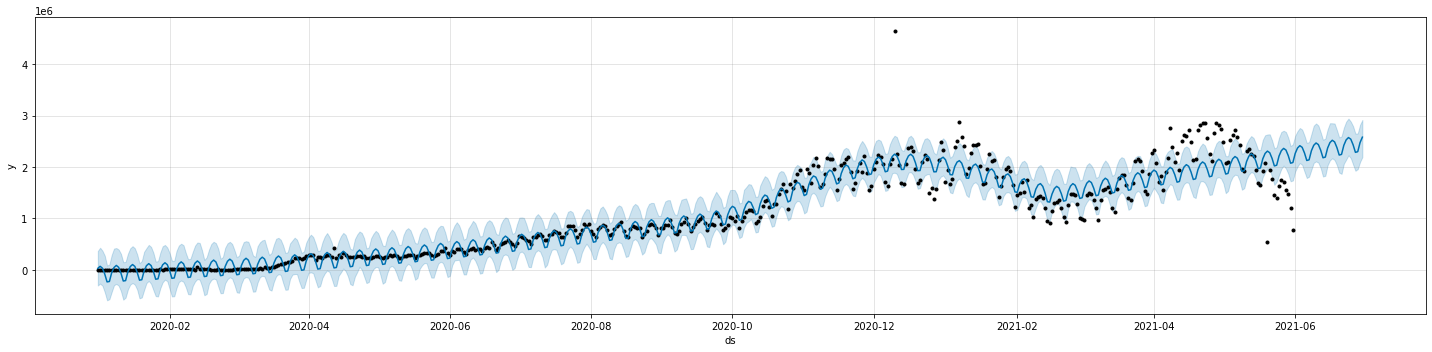

In [45]:
df_1 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast,figsize=(20,5));

In [46]:
df_2=df_covid.groupby('date').aggregate({'new_deaths':'sum'})
df_2=pd.DataFrame(df_2)
df_2=df_2.reset_index()
df_2

,date,new_deaths
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
512,2021-05-27,39158
513,2021-05-28,36255
514,2021-05-29,32043
515,2021-05-30,23425


# **forecasting for new deaths**

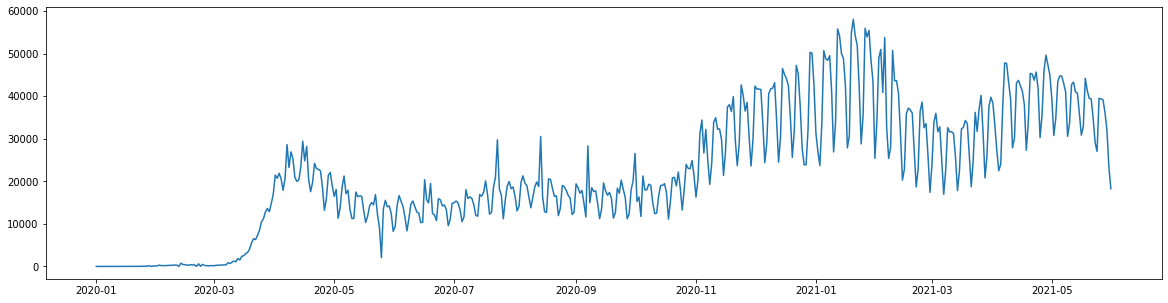

In [47]:
plt.figure(figsize=(20,5))
plt.plot(df_2['date'],df_2['new_deaths'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


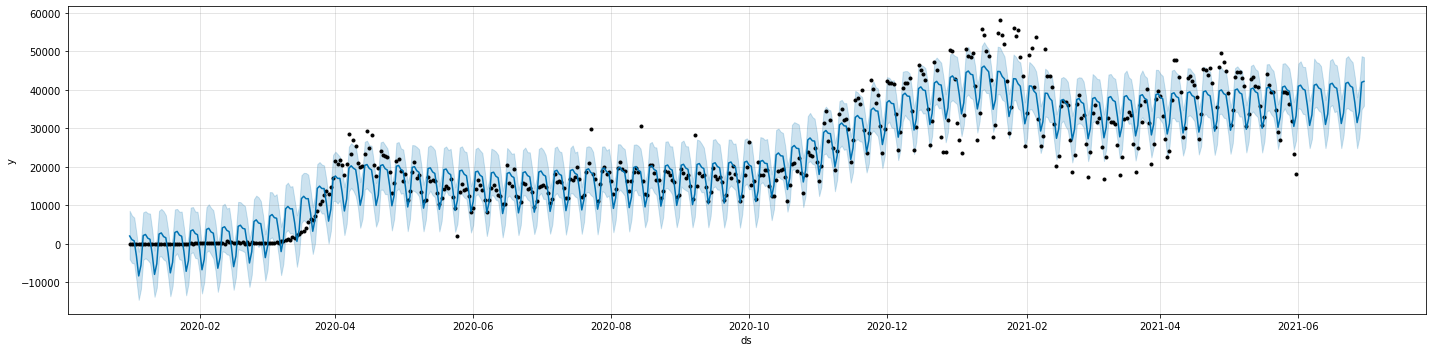

In [48]:
df_2= df_2.rename(columns ={'new_deaths':'y','date':'ds'})
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_2)
x = model.make_future_dataframe(periods =30,freq='D')
forecast = model.predict(x)
forecast.head()
df_2 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast,figsize=(20,5));

In [49]:
df_3=df_covid.groupby('date').aggregate({'new_vaccinations':'sum'})
df_3=pd.DataFrame(df_3)
df_3=df_3.reset_index()
df_3

,date,new_vaccinations
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
512,2021-05-27,103070010
513,2021-05-28,100091500
514,2021-05-29,91531209
515,2021-05-30,79161725


# **forecasting for new vaccinations**

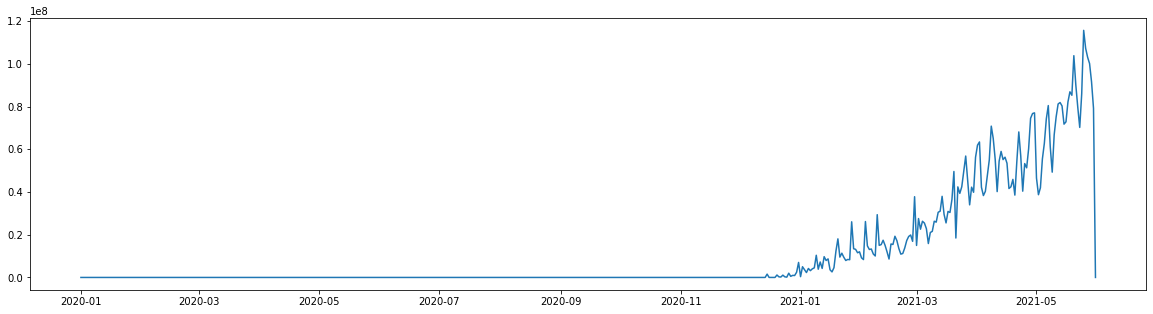

In [50]:
plt.figure(figsize=(20,5))
plt.plot(df_3['date'],df_3['new_vaccinations'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


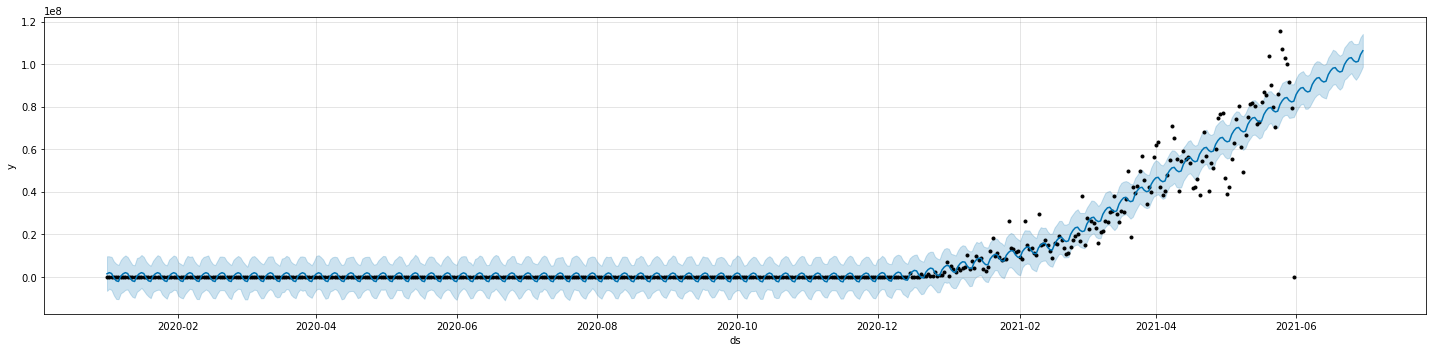

In [51]:
df_3= df_3.rename(columns ={'new_vaccinations':'y','date':'ds'})
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_3)
x = model.make_future_dataframe(periods =30,freq='D')
forecast = model.predict(x)
forecast.head()
df_3 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast,figsize=(20,5));

# **INDIA**

In [52]:
df=df_covid[df_covid['location'].str.contains('India')]

In [53]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
38745,IND,Asia,India,2021-05-27,27555457.0,186364,217638.000,318895.0,3660,3937.714,19967.659,135.046,157.708,231.083,2.652,2.853,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2157857.0,336969353.0,244.18,1.564,2087595.0,1.513,0.104,9.6,samples tested,201203166.0,158783606.0,42419560.0,2777551,1902326.0,14.58,11.51,3.07,1378.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38746,IND,Asia,India,2021-05-28,27729247.0,173790,205708.143,322512.0,3617,3855.286,20093.593,125.934,149.063,233.704,2.621,2.794,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203166802.0,160605562.0,42561240.0,1963636,1971730.0,14.72,11.64,3.08,1429.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38747,IND,Asia,India,2021-05-29,27894800.0,165553,194952.571,325972.0,3460,3815.143,20213.559,119.966,141.270,236.211,2.507,2.765,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207088953.0,164158704.0,42930249.0,3922151,2320922.0,15.01,11.90,3.11,1682.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38748,IND,Asia,India,2021-05-30,28047534.0,152734,185012.429,329100.0,3128,3625.714,20324.235,110.676,134.067,238.478,2.267,2.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208665123.0,165598013.0,43067110.0,1576170,2420840.0,15.12,12.00,3.12,1754.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
38749,IND,Asia,India,2021-05-31,28047534.0,0,156951.429,329100.0,0,3124.143,20324.235,0.000,113.733,238.478,0.000,2.264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 38262 to 38749
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               488 non-null    object        
 1   continent                              488 non-null    object        
 2   location                               488 non-null    object        
 3   date                                   488 non-null    datetime64[ns]
 4   total_cases                            488 non-null    float64       
 5   new_cases                              488 non-null    int64         
 6   new_cases_smoothed                     483 non-null    float64       
 7   total_deaths                           447 non-null    float64       
 8   new_deaths                             488 non-null    int64         
 9   new_deaths_smoothed                    483 non-null    floa

In [55]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.880000e+02,488.000000,483.000000,447.000000,488.000000,483.000000,488.000000,488.000000,483.000000,447.000000,447.000000,483.000000,441.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.150000e+02,4.250000e+02,425.000000,415.000000,4.340000e+02,434.000000,434.000000,434.000000,1.310000e+02,1.310000e+02,1.020000e+02,4.880000e+02,1.350000e+02,131.000000,131.000000,102.000000,135.000000,482.000000,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,4.880000e+02,488.00,4.880000e+02
mean,6.727559e+06,57474.454918,57320.748905,100864.190157,674.385246,666.134890,4875.027053,41.648018,41.536660,73.089747,0.533503,0.482692,1.169252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.908187e+05,1.149823e+08,83.320219,0.573072,7.618002e+05,0.552041,0.067760,23.287097,7.398716e+07,6.081546e+07,1.691659e+07,4.022493e+05,1.493691e+06,5.361450,4.406870,1.225882,1082.370370,70.610166,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,69.66,6.450000e-01
std,6.827451e+06,88493.805355,88004.657065,79925.771419,982.717188,959.418236,4947.412465,64.125742,63.771292,57.917065,0.727834,0.695234,0.302600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.181680e+05,1.020352e+08,73.938315,0.375496,5.085375e+05,0.368502,0.048231,15.744377,7.036059e+07,5.614069e+07,1.457328e+07,9.171393e+05,1.031301e+06,5.098703,4.068459,1.055833,747.329691,21.758838,0.000000e+00,3.584810e-12,2.169379e-13,2.489452e-14,1.111362e-14,7.647595e-11,4.978903e-14,9.673297e-13,2.845087e-14,1.511453e-14,1.884870e-13,4.765522e-13,7.779536e-16,0.00,2.222725e-16
min,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,0.000000,0.001000,0.000000,0.000000,0.001000,-0.001000,0.000000,0.780000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.570000e+02,6.500000e+03,0.005000,0.000000,1.121000e+03,0.001000,0.016000,4.400000,0.000000e+00,0.000000e+00,7.668000e+03,0.000000e+00,1.121500e+05,0.000000,0.000000,0.000000,81.000000,10.190000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,69.66,6.450000e-01
25%,1.884135e+05,7298.250000,8576.071500,17617.000000,100.000000,103.857000,136.531000,5.288750,6.215000,12.766000,0.095000,0.075000,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.813310e+05,1.074083e+07,7.783000,0.204000,2.255832e+05,0.163750,0.034250,11.625000,9.516640e+06,9.113116e+06,4.832548e+06,0.000000e+00,3.655975e+05,0.690000,0.660000,0.347500,265.000000,61.570000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,69.66,6.450000e-01
50%,6.269174e+06,24781.000000,24135.857000,115914.000000,3

In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                 0
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         47
icu_patients                             488
icu_patients_per_million                 488
hosp_patients                            488
hosp_patients_per_million                488
weekly_icu_admissions                    488
weekly_icu

In [58]:
df.shape                       

(488, 59)

In [59]:
  df1=df.iloc[:,3:10]            


In [60]:
df1.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed
38262,2020-01-30,1.0,1,NaN,NaN,0,NaN
38263,2020-01-31,1.0,0,NaN,NaN,0,NaN
38264,2020-02-01,1.0,0,NaN,NaN,0,NaN
38265,2020-02-02,2.0,1,NaN,NaN,0,NaN
38266,2020-02-03,3.0,1,NaN,NaN,0,NaN


In [61]:
df1['new_deaths'].fillna('0',inplace=True)

In [62]:
df1['date'] = pd.to_datetime(df['date'])

In [63]:
df1.dtypes

date                   datetime64[ns]
total_cases                   float64
new_cases                       int64
new_cases_smoothed            float64
total_deaths                  float64
new_deaths                      int64
new_deaths_smoothed           float64
dtype: object

In [64]:
df1['new_cases'] = df1['new_cases'].astype(int)
df1['new_deaths'] = df1['new_deaths'].astype(int)

In [65]:
df1.dtypes

date                   datetime64[ns]
total_cases                   float64
new_cases                       int64
new_cases_smoothed            float64
total_deaths                  float64
new_deaths                      int64
new_deaths_smoothed           float64
dtype: object

# **forecasting for new cases and new deaths in india**

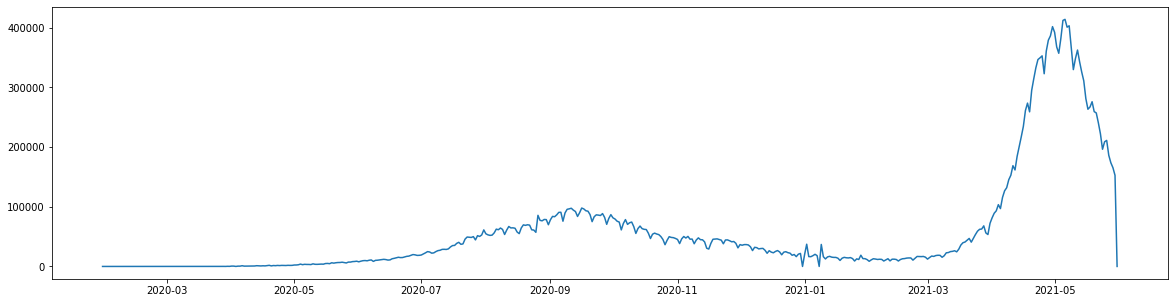

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df1['date'],df1['new_cases'])


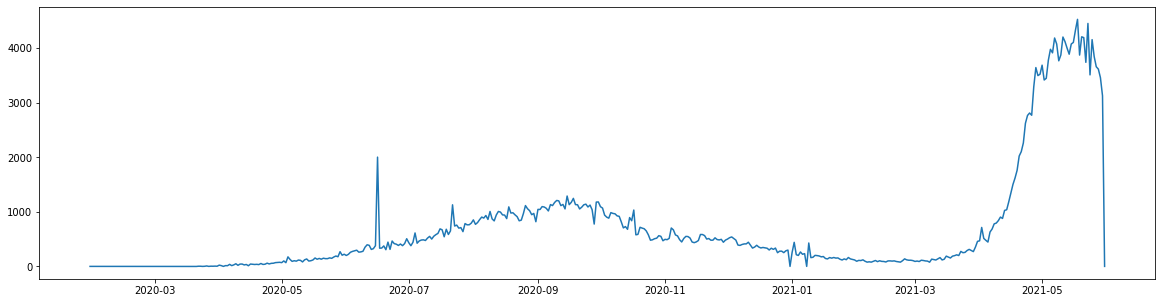

In [67]:
plt.figure(figsize=(20,5))
plt.plot(df1['date'],df1['new_deaths'])

In [68]:
df2= df1.rename(columns ={'new_cases':'y','date':'ds'})

In [69]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df2)
x = model.make_future_dataframe(periods =30,freq='D')
forecast = model.predict(x)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-5471.892481,-52994.145216,49497.591573,-5471.892481,-5471.892481,2354.406013,2354.406013,2354.406013,2354.406013,2354.406013,2354.406013,0.0,0.0,0.0,-3117.486468
1,2020-01-31,-5360.756053,-52206.424169,44322.791485,-5360.756053,-5360.756053,2272.404757,2272.404757,2272.404757,2272.404757,2272.404757,2272.404757,0.0,0.0,0.0,-3088.351296
2,2020-02-01,-5249.619624,-51782.269848,50703.573935,-5249.619624,-5249.619624,2277.271726,2277.271726,2277.271726,2277.271726,2277.271726,2277.271726,0.0,0.0,0.0,-2972.347898
3,2020-02-02,-5138.483196,-59543.610268,43206.554356,-5138.483196,-5138.483196,-1161.070118,-1161.070118,-1161.070118,-1161.070118,-1161.070118,-1161.070118,0.0,0.0,0.0,-6299.553313
4,2020-02-03,-5027.346767,-61211.728487,36175.513958,-5027.346767,-5027.346767,-9419.096148,-9419.096148,-9419.096148,-9419.096148,-9419.096148,-9419.096148,0.0,0.0,0.0,-14446.442915


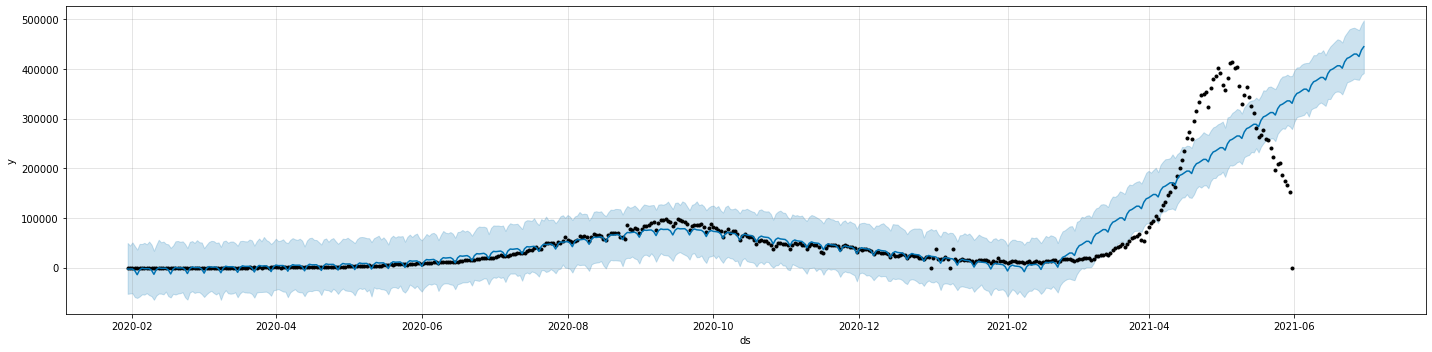

In [70]:
df3 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast,figsize=(20,5));

In [71]:
df4= df1.rename(columns ={'new_deaths':'y','date':'ds'})

In [72]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df4)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast1 = model.predict(x)
forecast1.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-58.063447,-515.764717,443.159064,-58.063447,-58.063447,18.048738,18.048738,18.048738,18.048738,18.048738,18.048738,0.0,0.0,0.0,-40.014709
1,2020-01-31,-56.485965,-502.932164,436.183698,-56.485965,-56.485965,19.875230,19.875230,19.875230,19.875230,19.875230,19.875230,0.0,0.0,0.0,-36.610735
2,2020-02-01,-54.908483,-556.706298,410.107834,-54.908483,-54.908483,6.894345,6.894345,6.894345,6.894345,6.894345,6.894345,0.0,0.0,0.0,-48.014139
3,2020-02-02,-53.331002,-543.530758,411.078528,-53.331002,-53.331002,-24.303130,-24.303130,-24.303130,-24.303130,-24.303130,-24.303130,0.0,0.0,0.0,-77.634131
4,2020-02-03,-51.753520,-627.799177,314.051424,-51.753520,-51.753520,-99.300525,-99.300525,-99.300525,-99.300525,-99.300525,-99.300525,0.0,0.0,0.0,-151.054045


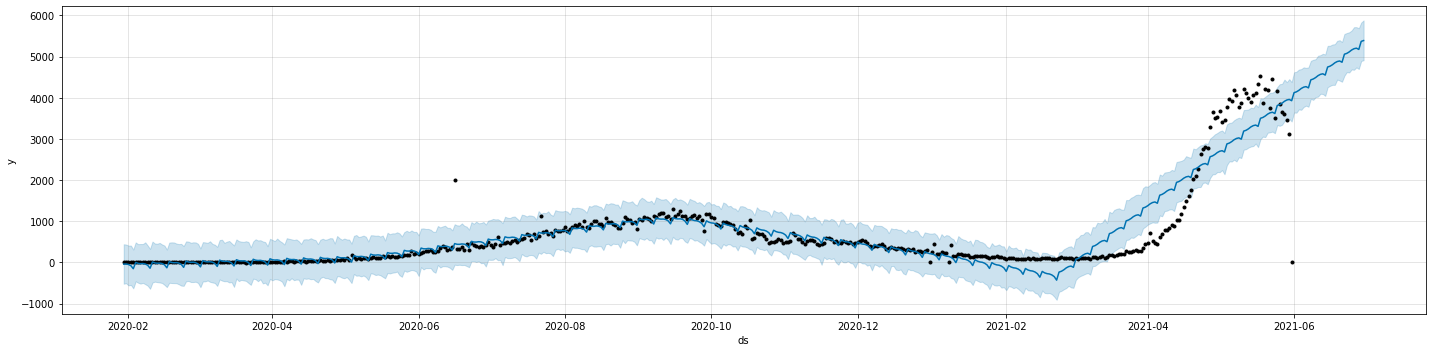

In [73]:
df5= forecast1[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast1,figsize=(20,5));

In [74]:
df_vac=df.iloc[:,[3,34,35,36,37]] 

In [75]:
df_vac.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
38262,2020-01-30,NaN,NaN,NaN,0
38263,2020-01-31,NaN,NaN,NaN,0
38264,2020-02-01,NaN,NaN,NaN,0
38265,2020-02-02,NaN,NaN,NaN,0
38266,2020-02-03,NaN,NaN,NaN,0


In [76]:
df_vac['new_vaccinations'].fillna('0',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df_vac['people_fully_vaccinated'].fillna('0',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df_vac['date'] = pd.to_datetime(df_vac['date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
df_vac['new_vaccinations'] = df_vac['new_vaccinations'].astype(int)
df_vac['people_fully_vaccinated'] = df_vac['people_fully_vaccinated'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **forecasting for new vaccinations and people fully vaccinated in india**

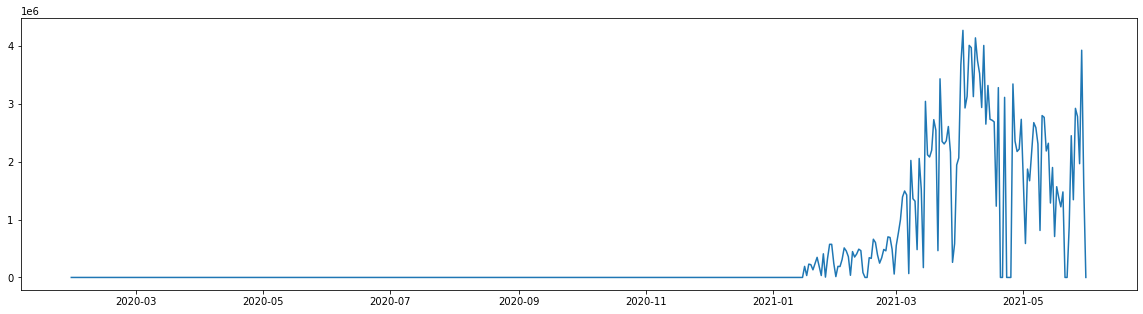

In [80]:
plt.figure(figsize=(20,5))
plt.plot(df_vac['date'],df_vac['new_vaccinations'])

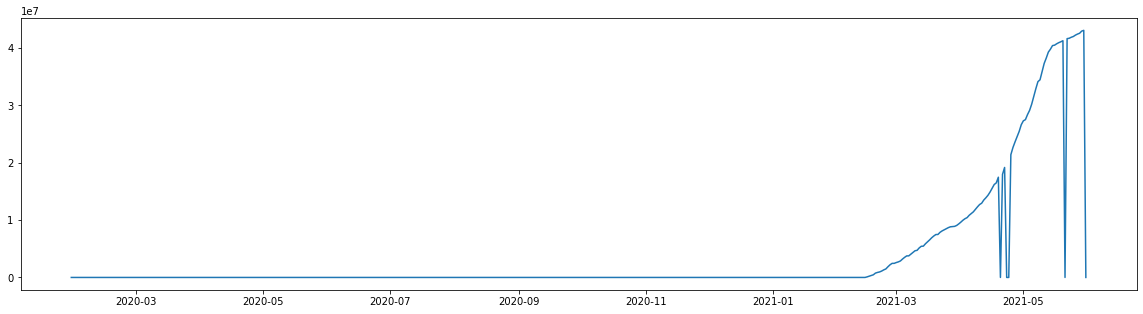

In [81]:
plt.figure(figsize=(20,5))
plt.plot(df_vac['date'],df_vac['people_fully_vaccinated'])

In [82]:
df_vac1= df_vac.rename(columns ={'new_vaccinations':'y','date':'ds'})

In [83]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_vac1)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast2= model.predict(x)
forecast2.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,1998.418392,-586009.643013,817155.527384,1998.418392,1998.418392,100322.488386,100322.488386,100322.488386,100322.488386,100322.488386,100322.488386,0.0,0.0,0.0,102320.906778
1,2020-01-31,1938.388204,-663066.681261,791152.440730,1938.388204,1938.388204,46521.847659,46521.847659,46521.847659,46521.847659,46521.847659,46521.847659,0.0,0.0,0.0,48460.235863
2,2020-02-01,1878.358016,-728177.167330,726317.154114,1878.358016,1878.358016,1034.507541,1034.507541,1034.507541,1034.507541,1034.507541,1034.507541,0.0,0.0,0.0,2912.865557
3,2020-02-02,1818.327828,-917905.801251,485752.982562,1818.327828,1818.327828,-221991.287080,-221991.287080,-221991.287080,-221991.287080,-221991.287080,-221991.287080,0.0,0.0,0.0,-220172.959252
4,2020-02-03,1758.297640,-639331.702167,717358.787870,1758.297640,1758.297640,77243.617500,77243.617500,77243.617500,77243.617500,77243.617500,77243.617500,0.0,0.0,0.0,79001.915140


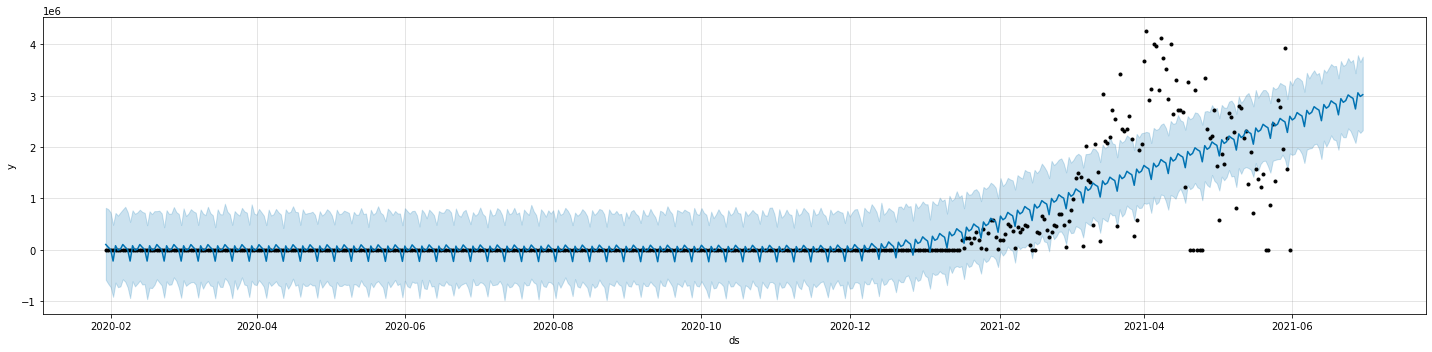

In [84]:
df_vac2= forecast2[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast2,figsize=(20,5));

In [85]:
df_vac3= df_vac.rename(columns ={'people_fully_vaccinated':'y','date':'ds'})

In [86]:
from fbprophet import Prophet
model = Prophet(changepoint_prior_scale=0.2)
model.fit(df_vac3)
x = model.make_future_dataframe(periods = 30,freq='D')
forecast3 = model.predict(x)
forecast3.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,33258.942232,-4.154158e+06,4.795133e+06,33258.942232,33258.942232,284444.025594,284444.025594,284444.025594,284444.025594,284444.025594,284444.025594,0.0,0.0,0.0,317702.967825
1,2020-01-31,33082.375317,-4.980589e+06,4.131109e+06,33082.375317,33082.375317,-562292.303310,-562292.303310,-562292.303310,-562292.303310,-562292.303310,-562292.303310,0.0,0.0,0.0,-529209.927993
2,2020-02-01,32905.808402,-4.643291e+06,4.529375e+06,32905.808402,32905.808402,36358.473053,36358.473053,36358.473053,36358.473053,36358.473053,36358.473053,0.0,0.0,0.0,69264.281455
3,2020-02-02,32729.241487,-4.014412e+06,4.735508e+06,32729.241487,32729.241487,290765.865398,290765.865398,290765.865398,290765.865398,290765.865398,290765.865398,0.0,0.0,0.0,323495.106885
4,2020-02-03,32552.674573,-4.562530e+06,4.413190e+06,32552.674573,32552.674573,-292961.628764,-292961.628764,-292961.628764,-292961.628764,-292961.628764,-292961.628764,0.0,0.0,0.0,-260408.954192


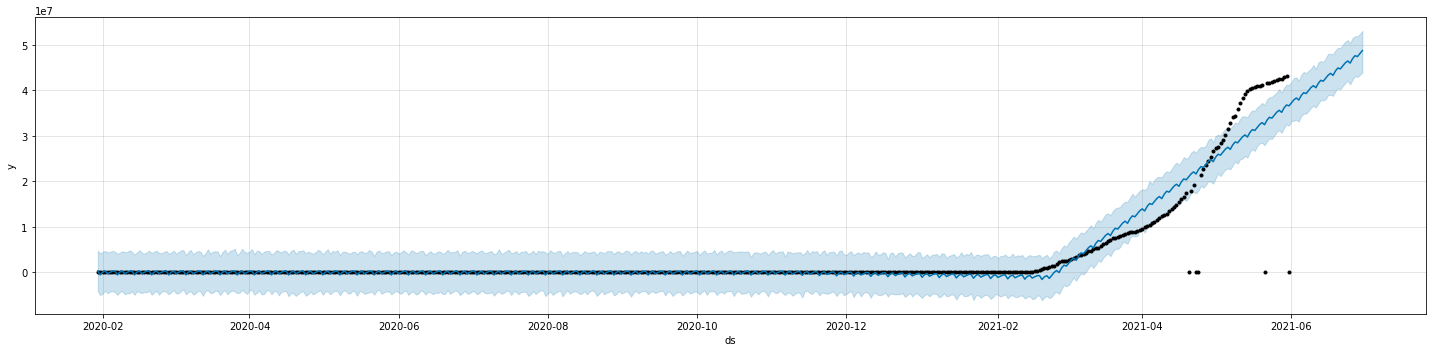

In [87]:
df_vac4= forecast3[['ds','trend','yhat_lower','yhat_upper','yhat']]
# Pandas plotting
model.plot(forecast3,figsize=(20,5));